# Using Machine Learning Tools 2021, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing optimised deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- **Before submitting your notebook, make sure to reset the kernel and run all cells in your final notebook so that it works correctly!**
- In the submission file name, do not use spaces or special characters.

This assignment is divided into several tasks. Use this notebook and enter your code, results and answer text analysis under the exact number that it belongs to!

Make sure to answer every question with **separate answer text (“Answer: …”) in a Markdown cell** and check that you answered all sub-questions/aspects within the question. The text answers are worth points!

Make the **figures self-explanatory and unambiguous.** Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points.

The assignment is self-sufficient. If you need to "evaluate" or "compare", then **use the diagrams and metrics generated in the preceding parts** of the assignment, not new ones.


## Outline

The main steps in the assignment are outlined here, so that you can appreciate the bigger picture. Some of the steps are purely for testing your knowledge and demonstrating certain things, but in general it outlines the main process that you would go through to solve a practical problem.

- To start with we load the data, visualise and explore it. You should always do this in any problem.

- After this we will implement a simple deep learning network that will act as our baseline for comparisons and optimisations. In this assignment we will specify the settings, but in practice you can usually find these from published papers, blogs/competitions, advice from colleagues, or just a little bit of trial and error. 

- Afterwards, the bulk of the assignment will focus on tuning the network and trying alternatives to give the best performance. This is something you will need to do systematically, and demonstrates the approach that you would take in any practical problem. Some limitations will be given, in order to help you in this assignment, but it should be clear how to extrapolate these to a more general setting for other datasets and tasks.

- Once the optimal network is found, the performance will be evaluated.

- A free choice element at the end will allow you to explore some extra aspects, beyond the limitations imposed above.


Feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

### 1. Load and inspect the data (5 Points)

We will use a dataset that contains images of hands in poses corresponding to letters in Amercian Sign Language. Each image is small (similar to MNIST size) and we will build a CNN classifier (using Keras) to determine the corresponding letter for an image. 

1. Load the dataset, look at examples of the images and the summary statistics and information for the class labels. (1 Point)
2. Perform any necessary pre-processing of the images. (1 Point)
3. Visulise the labels and make any adjustments you deem necessary. (1 Point)
4. Create a validation set and any necessary test sets using only the supplied *testing* dataset.  It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be independent of the training data and not made from augmented instances of training images. (2 Points)

In [1]:
### Your code and answers here
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# load the data
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [2]:
#3 data information
print('The shape of the train dataset:' + str(train_data.shape))
print('The shape of the test dataset:' + str(test_data.shape))

The shape of the train dataset:(27455, 785)
The shape of the test dataset:(7172, 785)


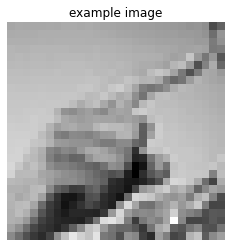

In [3]:
import matplotlib.pyplot as plt
# looke an example image(second one in train dataset)
plt.imshow(train_data.iloc[1, 1:,].values.reshape(28, 28),cmap ='gray')
plt.title('example image')
plt.axis('off')
plt.show()

In [4]:
# count how many labels and number of images in each labels in the train data set
train_data['label'].value_counts().sort_index()

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

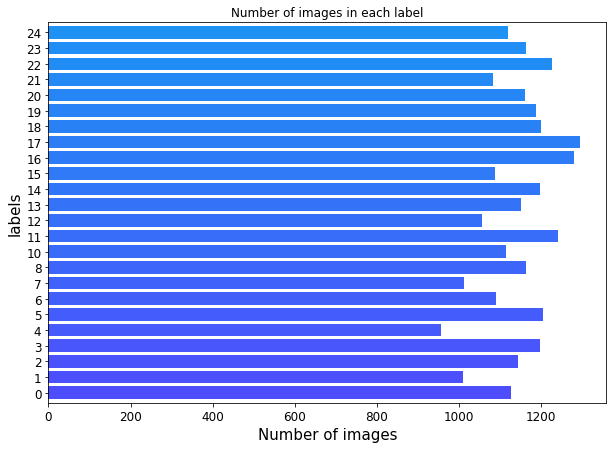

In [5]:
# Visulise the labels
from matplotlib import cm
import numpy as np
Count_label = train_data['label'].value_counts().sort_index()
plt.figure(figsize=(10,7))
color = cm.rainbow(np.linspace(0.1,0.3))
Count_label.plot(kind='barh',width=0.8,color = color,fontsize=12)
plt.title('Number of images in each label')
plt.ylabel('labels',fontsize=15)
plt.xlabel('Number of images',fontsize=15)
plt.show()

In [6]:
# resample the train data so that each label is well balanced
resampled_train_data = pd.DataFrame(columns=train_data.columns)
for i in train_data['label'].value_counts().index:
    resampled_train_data = resampled_train_data.append(train_data[train_data.label== i].sample(n=957,random_state=0))
resampled_train_data = resampled_train_data.sample(frac=1).reset_index(drop=True)
print('The shape of the resampled train dataset:' + str(resampled_train_data.shape))

The shape of the resampled train dataset:(22968, 785)


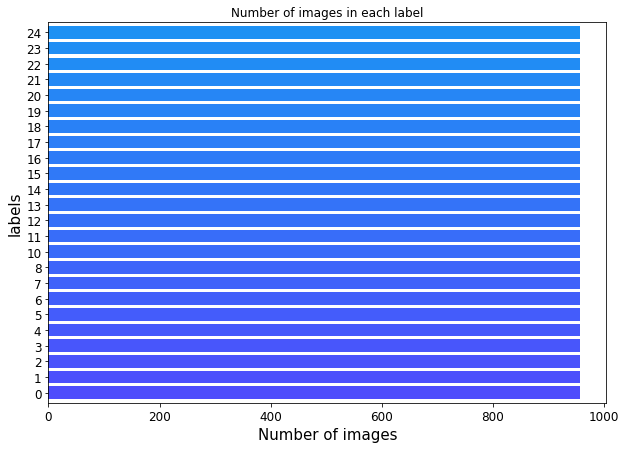

In [7]:
Count_resampled_label = resampled_train_data['label'].value_counts().sort_index()
plt.figure(figsize=(10,7))
color = cm.rainbow(np.linspace(0.1,0.3))
Count_resampled_label.plot(kind='barh',width=0.8,color = color,fontsize=12)
plt.title('Number of images in each label')
plt.ylabel('labels',fontsize=15)
plt.xlabel('Number of images',fontsize=15)
plt.show()

In [8]:
# Pre-process the images so all pixels are between 0 and 1
X_train = resampled_train_data.iloc[:, 1:].values/255
X_train= np.reshape(X_train, (len(X_train), 28, 28, 1)).astype('float32')
y_train = resampled_train_data.iloc[:, 0].values
y_train = y_train.reshape(-1,1).astype('float32')
X_test_full = test_data.iloc[:, 1:].values/255
y_test_full = test_data.iloc[:, 0].values

In [9]:
# Create a validation set
X_valid,X_test = X_test_full[:710],X_test_full[710:]
X_valid,X_test = np.reshape(X_valid, (len(X_valid), 28, 28, 1)).astype('float32'),np.reshape(X_test, (len(X_test), 28, 28, 1)).astype('float32')
y_valid,y_test = y_test_full[:710],y_test_full[710:]
y_valid,y_test = y_valid.reshape(-1,1).astype('float32'),y_test.reshape(-1,1).astype('float32')

### 2. Build and train a CNN (15 Points)
1. Build a CNN using Keras that has the following settings: (5 Points)
 - Layers: Conv32 - MaxPooling - Conv64 - MaxPooling - Conv128 - Flatten - Dense(100) - Output
    - Note that Conv32 means a convolutional layer with 32 filters, etc.
 - 3x3 kernel size,
 - ReLU activation functions for hidden layers,
 - No dropout layers,
 - No BatchNorm layers.
2. Train this network using appropriate data and metrics. The following settings should be used in training: (5 Points)
 - Nadam optimiser,
 - Fixed learning rate, using the default value for this optimiser,
 - Early stopping.
3. Display the learning curves, confusion matrix and performance values. (5 Points) 

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [11]:
### Your code and answers here
def generate_CNN():
    model = Sequential()
    model.add(Conv2D(32, kernel_size= 3,activation='relu', padding="same",input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size= 3, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size= 3, padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(25, activation='sigmoid'))
    return model

In [12]:
model = generate_CNN()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               6

In [13]:
max_epochs = 10
model.compile(optimizer=keras.optimizers.Nadam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True) 

In [14]:
history = model.fit(X_train, y_train, epochs=max_epochs,callbacks = [early_stopping], validation_data = (X_valid,y_valid))

Epoch 1/10
718/718 [==============================] - 16s 22ms/step - loss: 2.5454 - accuracy: 0.5843 - val_loss: 2.4126 - val_accuracy: 0.7099
Epoch 2/10
718/718 [==============================] - 16s 22ms/step - loss: 2.3393 - accuracy: 0.8623 - val_loss: 2.4161 - val_accuracy: 0.8070
Epoch 3/10
718/718 [==============================] - 16s 22ms/step - loss: 2.3160 - accuracy: 0.9202 - val_loss: 2.4052 - val_accuracy: 0.8507
Epoch 4/10
718/718 [==============================] - 16s 22ms/step - loss: 2.3053 - accuracy: 0.9553 - val_loss: 2.3857 - val_accuracy: 0.8620
Epoch 5/10
718/718 [==============================] - 16s 22ms/step - loss: 2.3014 - accuracy: 0.9679 - val_loss: 2.4194 - val_accuracy: 0.8606
Epoch 6/10
718/718 [==============================] - 16s 22ms/step - loss: 2.2976 - accuracy: 0.9753 - val_loss: 2.3926 - val_accuracy: 0.9127
Epoch 7/10
718/718 [==============================] - 16s 22ms/step - loss: 2.2968 - accuracy: 0.9771 - val_loss: 2.4144 - val_accuracy:

In [15]:
def plot_history(h,title):
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.legend(("train accuracy","test accuracy"))
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.subplot(122)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.legend(("train loss","test loss"))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.suptitle(title,fontsize=15)
    plt.show()

In [16]:
eval_results = model.evaluate(X_test, y_test, verbose=0) 
print("Loss on test data: " + str(round(eval_results[0],2)))
print("Accuracy on test data: "   +'%s%%'%(round(eval_results[1]*100,2)))

Loss on test data: 2.39
Accuracy on test data: 91.43%


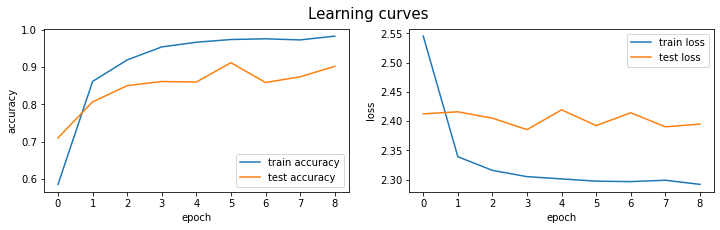

In [17]:
plot_history(history,'Learning curves')

In [18]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
y_pred =model.predict_classes(X_test)
cm = multilabel_confusion_matrix(y_test,y_pred)
print( classification_report(y_test,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       302
         1.0       1.00      0.95      0.97       393
         2.0       0.94      0.97      0.96       279
         3.0       0.85      1.00      0.92       219
         4.0       0.95      0.96      0.96       448
         5.0       0.95      1.00      0.97       222
         6.0       0.95      0.94      0.95       314
         7.0       0.87      0.96      0.91       395
         8.0       0.94      0.92      0.93       256
        10.0       0.87      0.90      0.89       302
        11.0       0.91      1.00      0.95       192
        12.0     

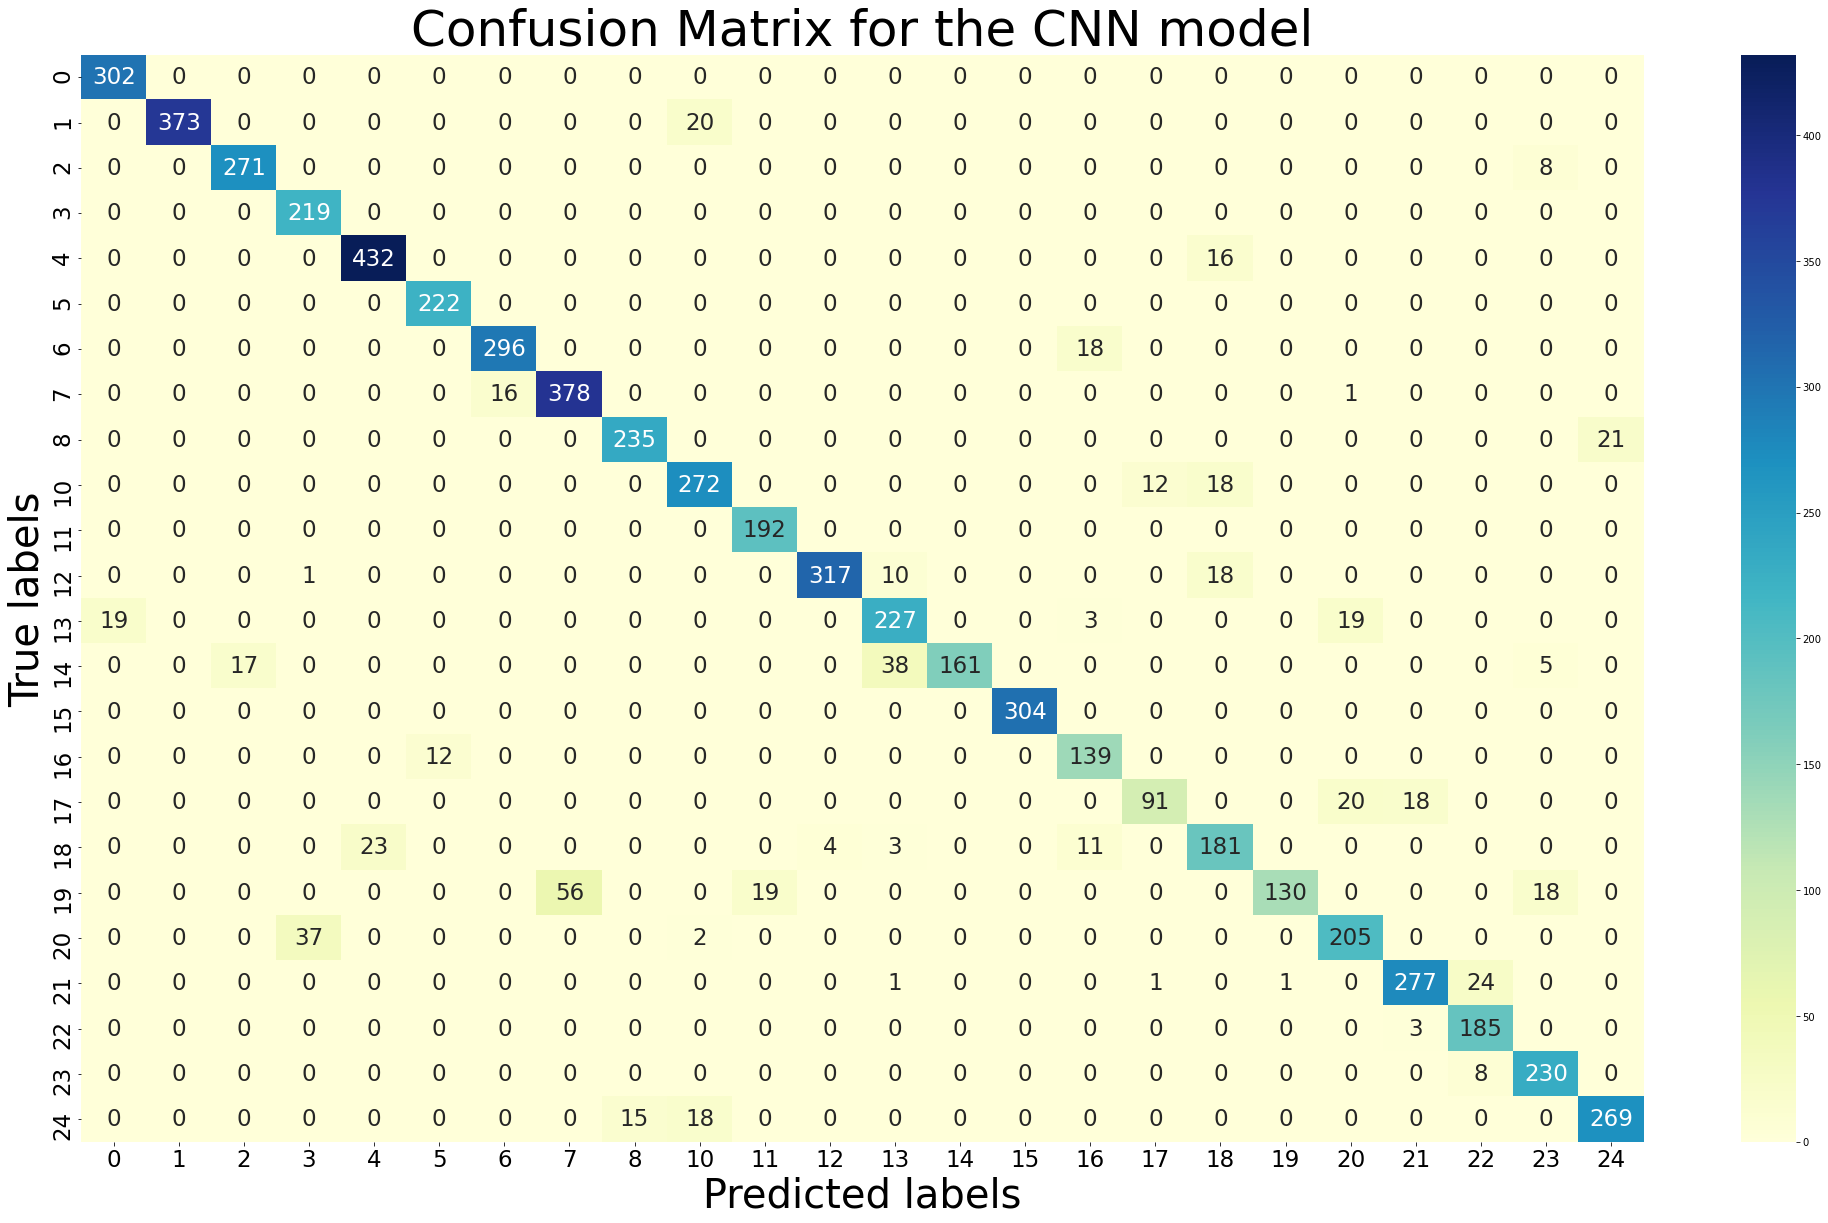

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
con_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(35,20))
sns.heatmap(con_matrix,xticklabels=set(y_pred), yticklabels=set(y_pred),
            fmt='g',cmap="YlGnBu", annot=True,annot_kws={"size": 23})
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.xlabel('Predicted labels',fontsize=40);plt.ylabel('True labels',fontsize=40)
plt.title('Confusion Matrix for the CNN model',fontsize=50)
plt.show()

### 3. Hyper-parameter optimisation (14 Points)
Take the base network from the previous part and perform *separate* hyper-parameter optimisation over the following 2 hyper-parameters. In both cases leave the layer sizes and other configurations constant.

1. Optimise the learning rate value, or learning rate schedule. (3 Points)
2. Optimise the L2 regularisation on the kernels in all layers. (3 Points)
3. Display your results as two plots of the performance versus the hyper-parameter value(s). Practice unambiguous and organised visualisation, by labelling the axis, using a legend, title, axis limits and suitable marker and line styles. Make sure to choose the axis limits, such that the important parts of the data are clearly visible. (6 Points)
4. Question: What are the best hyper-parameter values to use? Where can we see this in the diagrams and outputs generated above? (2 Points)

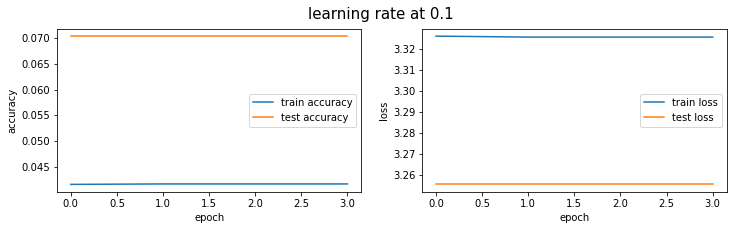

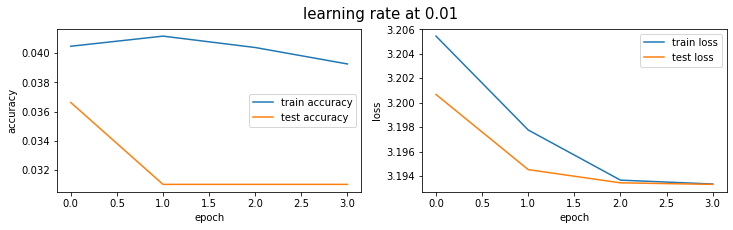

In [ ]:
### Your code and answers here
learning_rates = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5]
result = []
for lr in learning_rates:
    model = generate_CNN()
    model.compile(optimizer=keras.optimizers.Nadam(lr =lr),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=max_epochs,callbacks = [early_stopping],
                        validation_data = (X_valid,y_valid), verbose=0)
    eval_results = model.evaluate(X_test, y_test, verbose=0) 
    result.append([lr,eval_results[0],eval_results[1]])
    plot_history(history,'learning rate at '+ str(lr)) 

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(np.array(result)[:,0],np.array(result)[:,2],'-o')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Test accuracy for different learning rate')
plt.subplot(122)
plt.plot(np.array(result)[:,0],np.array(result)[:,1],'-o')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Test loss for different learning rate')
plt.show()

In [ ]:
def add_L2regularizers(model,regularizer):
    for layer in model.layers:
        reg = 'kernel_regularizer'
        if hasattr(layer, reg):
            setattr(layer, reg, regularizer)
    return model

In [ ]:
Penalty = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5]
L2_result = []
for p in Penalty:
    model = generate_CNN()
    regularizer = keras.regularizers.l2(p)
    model = add_L2regularizers(model,regularizer)
    model.compile(optimizer=keras.optimizers.Nadam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=max_epochs,callbacks = [early_stopping],
                        validation_data = (X_valid,y_valid), verbose=0)
    eval_results = model.evaluate(X_test, y_test, verbose=0) 
    L2_result.append([p,eval_results[0],eval_results[1]])
    plot_history(history,'L2 regularisation pentalty at '+ str(p)) 

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(np.array(L2_result)[:,0],np.array(L2_result)[:,2],'-o')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Test accuracy for different  L2 regularisation')
plt.subplot(122)
plt.plot(np.array(L2_result)[:,0],np.array(L2_result)[:,1],'-o')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Test loss for different L2 regularisation')
plt.show()

### 4. Larger CNN and ResNet (16 Points)
In this part you will implement a larger version of the previous CNN as well as a ResNet version of this network. 
1. Implement a CNN with the following architecture:
 - Layers: Conv32 - Conv32 - MaxPooling - Conv64 - Conv64 - MaxPooling - Conv128 - Conv128 - Flatten - Dense(100) - Output
Keep the same settings for other parameters as was used in section 2. Train this network with the Sign Language dataset. (5 Points)
2. ResNet: Start with making a function that builds residual modules with two convolutional layers and a skip connection that adds the input to the output of the second layer, prior to the use of the activation function. Then build a new network similar to the one above (point 1), but replace the convolutional layer pairs in the network with ResNet modules. Note that you will need to use the functional form of Keras models for this. An introduction ResNet can be found in  chapter 14 of Géron and in Workshop 11. Train this network with the Sign Language dataset. (5 Points)
4. Display your learning curves and performance results. (3 Points)
5. Question: Which network performs better? Where can we see this in the outputs generated above? (3 Points)

In [ ]:
### Your code and answers here
def generate_largeCNN():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3,activation='relu', padding="same",input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation='relu'))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=3, padding="same", activation='relu'))
    model.add(Conv2D(128, kernel_size=3, padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(25, activation='sigmoid'))
    return model

In [ ]:
model = generate_largeCNN()
model.summary()

In [ ]:
max_epochs = 10
model.compile(optimizer=keras.optimizers.Nadam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True) 
history = model.fit(X_train, y_train, epochs=max_epochs,callbacks = [early_stopping], validation_data = (X_valid,y_valid))

In [ ]:
eval_results = model.evaluate(X_test, y_test, verbose=0) 
print("Loss on test data: " + str(round(eval_results[0],2)))
print("Accuracy on test data: "   +'%s%%'%(round(eval_results[1]*100,2)))
plot_history(history,'Learning curves')

### 5. Final evaluation (10 Points)
1. Compare the networks using accuracy and choose the best network (from among all the options you have explored above in sections 2, 3 and 4) and display the accuracy of the best network. (5 Points)
2. Calculate the confusion matrix from these results and show the matrix graphically. (3 Points)
3. Question: Which class is most often incorrectly classified and what is the class that it is most commonly mistaken for? Explain your reasoning. (2 Points)

In [ ]:
### Your code and answers here

### 6. Joint Optimisation (20 Points)

In this section there is free choice - you can choose which **three** hyper-parameters/settings to investigate in order to improve the classification performance. Make sure that you clearly explain your process and show appropriate results. Again, the value achieved for the final performance are not that important - it is the process and display of understanding that counts.

Options are:
 - BatchNormalization
 - Activation function
 - Optimiser
 - Dropout rate in a dropout layer associated with the final dense layer (before the output layer)
 - Vary the number of *filters* in the Conv layers
 - Vary the *number* of Conv2D and MaxPooling *layers* and their ordering
 
Report your findings and show the final results, in the way that you might report your work to that of a technically minded manager/supervisor who had asked you to perform this optimisation. This should include enough information to demonstrate that you have followed a correct procedure. 

Points will be awarded as such: 6 for approach taken and rationale/explanation; 7 for code and correct training; 7 for display of selected intermediate and final results.

In [ ]:
### Your code and answers here

## Assessment
Hand in your notebook as an .ipynb file via the MyUni page. Make sure your notebook includes your code and formatted (Markdown) text blocks explaining what you have done. Your mark will be based on both code correctness and the quality of your comments and analysis. 

The assignment is worth 40% of your overall mark for the course.

Mark Jenkinson  
May 2021